In [1]:
import rlssm
import pandas as pd
import os

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1,1,61,52,4,3,1,1.285418,0
1,10,1,2,54,37,4,2,1,1.577622,0
2,10,1,3,51,51,4,3,2,1.564731,0
3,10,1,4,50,35,3,1,2,1.217245,1
4,10,1,5,59,50,4,2,3,1.929781,0


In [3]:
model = rlssm.LBAModel_2A(1)

Using cached StanModel


In [4]:
# sampling parameters
n_iter = 350
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
k_priors {'mu': 1, 'sd': 1}
A_priors {'mu': 0.3, 'sd': 1}
tau_priors {'mu': 0, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
model_fit.rhat.describe()

,rhat
count,1445.000000
mean,0.998983
std,0.003024
min,0.990000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.0,lp__
k,1.0,k
A,1.0,A
tau,1.0,tau
drift_cor,1.0,drift_cor


In [8]:
model_fit.waic

{'lppd': -236.99151180982068,
 'p_waic': 4.108317169535015,
 'waic': 482.1996579587114,
 'waic_se': 28.846196939430506}

### Posteriors

In [9]:
model_fit.samples

,transf_k,transf_A,transf_tau,transf_drift_cor,transf_drift_inc
0,2.84832,0.854097,0.279798,2.79214,1.99717
1,1.67740,3.327620,0.500895,3.18060,2.11686
2,2.44455,2.724180,0.354743,3.30547,2.21058
3,2.50401,2.441900,0.283845,3.06091,1.96241
4,1.45513,3.484250,0.560219,3.40990,2.41459
...,...,...,...,...,...
135,2.60587,2.574710,0.248947,2.98418,2.12272
136,2.15507,2.072370,0.355382,2.76928,1.64788
137,2.06982,1.161440,0.384659,2.36388,1.36333
138,1.47351,2.947270,0.544613,3.00860,1.86205


In [10]:
model_fit.trial_samples

{'k_t': array([[2.84832, 2.84832, 2.84832, ..., 2.84832, 2.84832, 2.84832],
        [1.6774 , 1.6774 , 1.6774 , ..., 1.6774 , 1.6774 , 1.6774 ],
        [2.44455, 2.44455, 2.44455, ..., 2.44455, 2.44455, 2.44455],
        ...,
        [2.06982, 2.06982, 2.06982, ..., 2.06982, 2.06982, 2.06982],
        [1.47351, 1.47351, 1.47351, ..., 1.47351, 1.47351, 1.47351],
        [1.62222, 1.62222, 1.62222, ..., 1.62222, 1.62222, 1.62222]]),
 'A_t': array([[0.854097, 0.854097, 0.854097, ..., 0.854097, 0.854097, 0.854097],
        [3.32762 , 3.32762 , 3.32762 , ..., 3.32762 , 3.32762 , 3.32762 ],
        [2.72418 , 2.72418 , 2.72418 , ..., 2.72418 , 2.72418 , 2.72418 ],
        ...,
        [1.16144 , 1.16144 , 1.16144 , ..., 1.16144 , 1.16144 , 1.16144 ],
        [2.94727 , 2.94727 , 2.94727 , ..., 2.94727 , 2.94727 , 2.94727 ],
        [2.40884 , 2.40884 , 2.40884 , ..., 2.40884 , 2.40884 , 2.40884 ]]),
 'tau_t': array([[0.279798, 0.279798, 0.279798, ..., 0.279798, 0.279798, 0.279798],
        

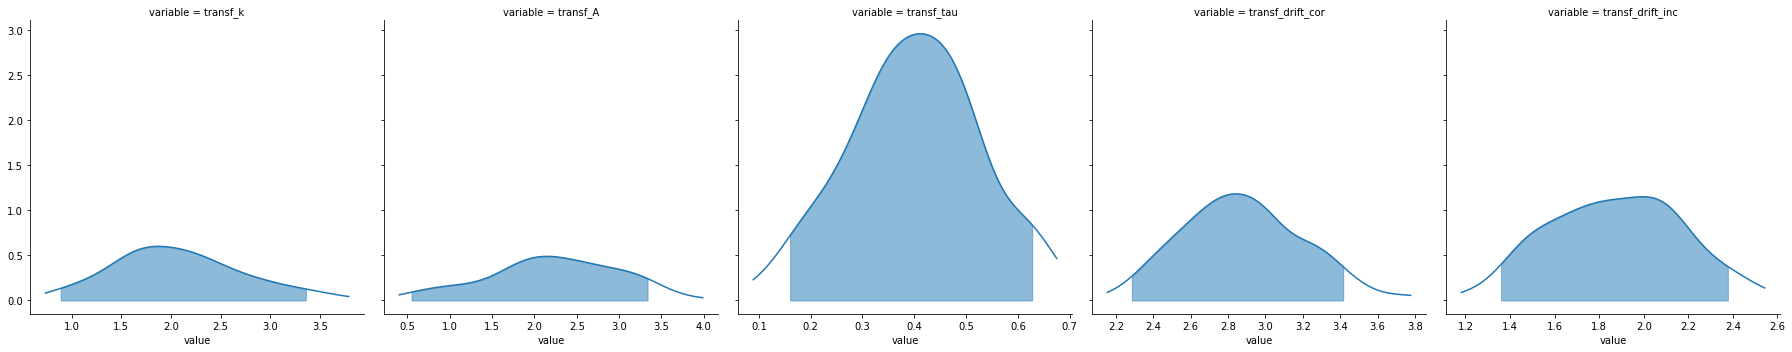

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

/var/folders/56/qbnffzv10bg6kcp5fhsvg2dh0000gn/T/ipykernel_7371/3557547225.py:1: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)


In [13]:
pp_rt

array([[2.59000379, 1.49972169, 1.3234151 , ..., 2.57184264, 2.62943178,
        1.47042677],
       [1.15126652, 1.38853217, 1.45865665, ..., 1.49664115, 1.74593123,
        1.0928587 ],
       [1.2564136 , 1.06689474, 1.01788679, ..., 1.9232795 , 1.58206123,
        1.03086349],
       ...,
       [1.35109022, 1.84273222, 1.24534634, ..., 2.1635012 , 1.18169213,
        1.49765946],
       [2.6182315 , 1.73322509, 2.18794874, ..., 1.59736877, 2.5276298 ,
        0.97919509],
       [0.98514189, 1.56580075, 1.84766562, ..., 1.42176323, 1.62037011,
        3.44780638]])

In [14]:
pp_acc

array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 1.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.707113,1.427971,1.503945,1.118934,1.226044,1.364048,1.496991,1.796236,1.032991,1.231386,1.343330,1.529875,1.816472
2,0.753138,1.503331,2.576012,1.154121,1.282533,1.464287,1.651758,2.242271,1.033530,1.196985,1.400520,1.585174,1.903371
3,0.723849,1.524225,1.461620,1.212909,1.348033,1.491356,1.696249,2.087474,1.055014,1.238271,1.450226,1.614527,1.995760
4,0.774059,1.461592,1.423497,1.052244,1.309710,1.548925,1.859518,2.378643,0.958537,1.130750,1.345065,1.557392,1.877039
5,0.694561,1.477851,1.008571,1.047064,1.199434,1.337169,1.522889,1.992716,1.038161,1.252628,1.443455,1.634283,2.087694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.740586,1.642532,13.401364,1.081969,1.386253,1.577003,1.935662,2.609648,1.000438,1.201049,1.354923,1.587124,1.871515
67,0.690377,1.482592,1.221889,1.082458,1.282634,1.491291,1.722041,2.112351,1.005842,1.192994,1.377000,1.580539,1.931916
68,0.740586,1.543053,4.354588,1.126368,1.346005,1.579862,1.750318,2.130172,1.081654,1.224064,1.395873,1.583116,2.069092


/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


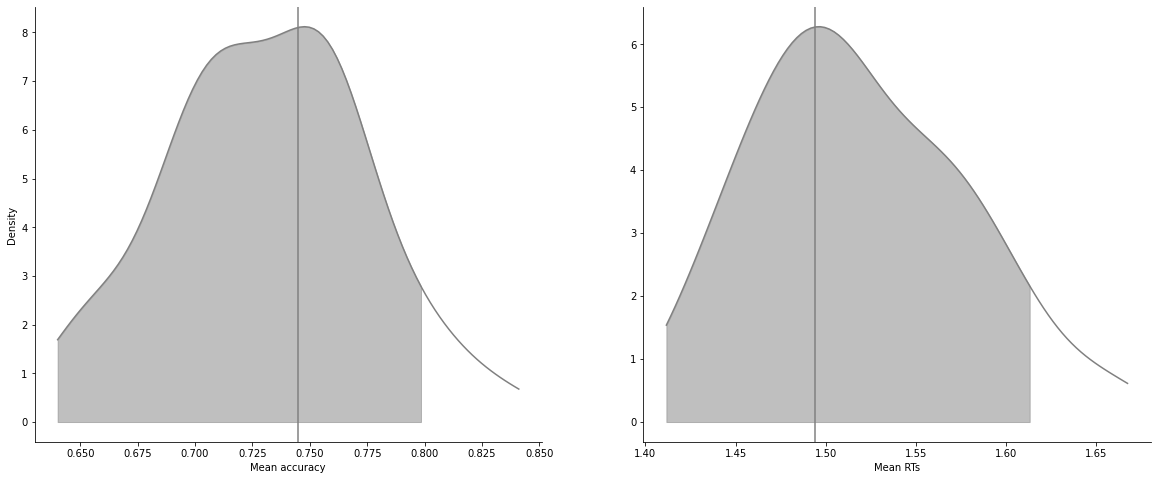

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


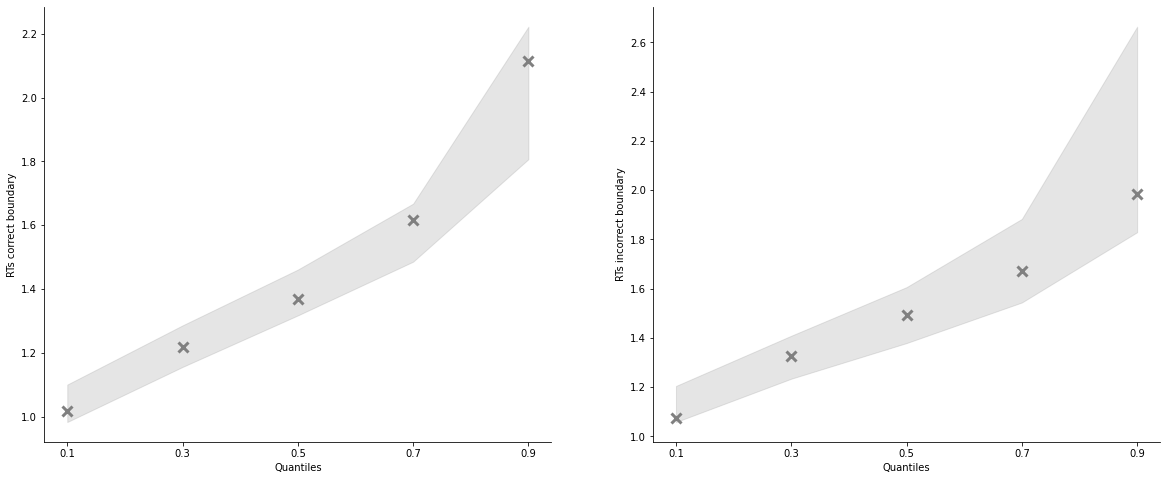

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,10,1,1,61,52,4,3,1,1.285418,0,2,CD,1
1,1,10,1,2,54,37,4,2,1,1.577622,0,2,BD,1
2,2,10,1,3,51,51,4,3,2,1.564731,0,2,CD,1
3,3,10,1,4,50,35,3,1,2,1.217245,1,1,AC,1
4,4,10,1,5,59,50,4,2,3,1.929781,0,2,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.80  1.407498  0.573340   
                        2                0.70  1.652109  0.727532   
                        3                0.75  1.683551  0.822415   
                        4                0.70  1.665631  0.298900   
                        5                0.70  1.374848  0.263746   
...                                       ...       ...       ...   
3           CD          66               0.70  1.447037  1.940362   
                        67               0.80  1.418667  1.513157   
                        68               0.70  1.428631  0.988521   
                        69               0.85  1.466970  1.472929   
                        70               0.75  1.604313  1.163730   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.277500             1.212039   
                        2                    1.530194             1.432391   
                        3                    1.730714             1.284979   
                        4                    1.500890             1.379703   
                        5                    1.278552             1.245380   
...                                               ...                  ...   
3           CD          66                   1.257865             1.065503   
                        67                   1.030999             1.202496   
                        68                   1.150753             1.157100   
                        69                   1.389378             1.249551   
                        70                   1.361358             1.307297   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.555762             1.350283   
                        2                    1.794873             1.558374   
                        3                    1.941237             1.550618   
                        4                    1.578625             1.587750   
                        5                    1.332977             1.387045   
...                                               ...                  ...   
3           CD          66                   1.338571             1.339081   
                        67                   1.103040             1.416022   
                        68                   1.230618             1.273143   
                        69                   1.512419             1.326061   
                        70                   1.405250             1.494712   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.817144             1.470562  
                        2                    2.022170             1.720128  
                        3                    1.984146             1.799854  
                        4                    1.830599             1.830379  
                        5                    1.562155             1.440071  
...                                               ...                  ...  
3           CD          66                   1.388533             1.416559  
                        67                   1.187288             1.657865  
                        68                   1.442950             1.667431  
                        69                   1.582485             1.613245  
                        70                   2.315348             1.681315  

[840 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.800000  1.519266  1.541229               1.357446   
           2            0.733333  1.476108  0.763593               1.286190   
           3            0.766667  1.424235  0.633111               1.436092   
           4            0.666667  1.577129  2.226992               1.341748   
           5            0.600000  1.548002  0.835522               1.318166   
...                          ...       ...       ...                    ...   
8          66           0.793103  1.480226  0.728474               1.618834   
           67           0.689655  1.489849  1.773157               1.201266   
           68           0.862069  1.492543  0.842774               1.664815   
           69           0.586207  1.538807  1.755524               1.466072   
           70           0.758621  1.435311  0.745606               1.428161   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.257186               1.365991   
           2                  1.283835               1.498170   
           3                  1.221483               1.569157   
           4                  1.364327               1.437766   
           5                  1.230145               1.467342   
...                                ...                    ...   
8          66                 1.189144               1.729992   
           67                 1.272141               1.563476   
           68                 1.232852               1.701283   
           69                 1.202650               1.586573   
           70                 1.152135               1.550887   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.463787               1.572128   
           2                  1.363796               1.647086   
           3                  1.290090               1.701738   
           4                  1.479457               1.621412   
           5                  1.462072               1.898305   
...                                ...                    ...   
8          66                 1.317322               1.861551   
           67                 1.398671               1.777785   
           68                 1.337531               1.748056   
           69                 1.353979               1.800347   
           70                 1.343967               1.758430   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.573933  
           2                  1.592590  
           3                  1.523228  
           4                  1.576818  
           5                  1.638687  
...                                ...  
8          66                 1.521815  
           67                 1.538453  
           68                 1.604238  
           69                 1.635149  
           70                 1.441575  

[560 rows x 9 columns]

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


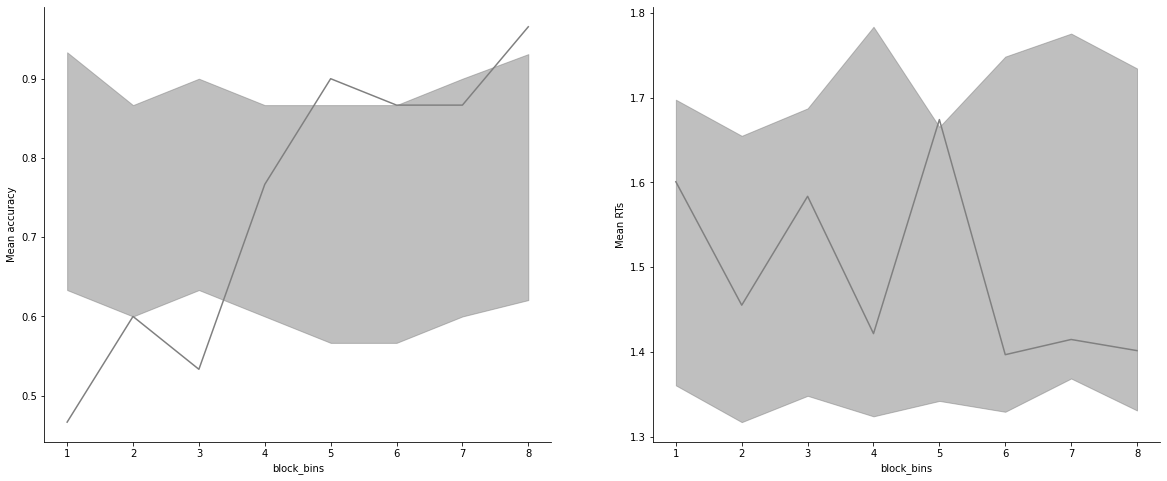

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


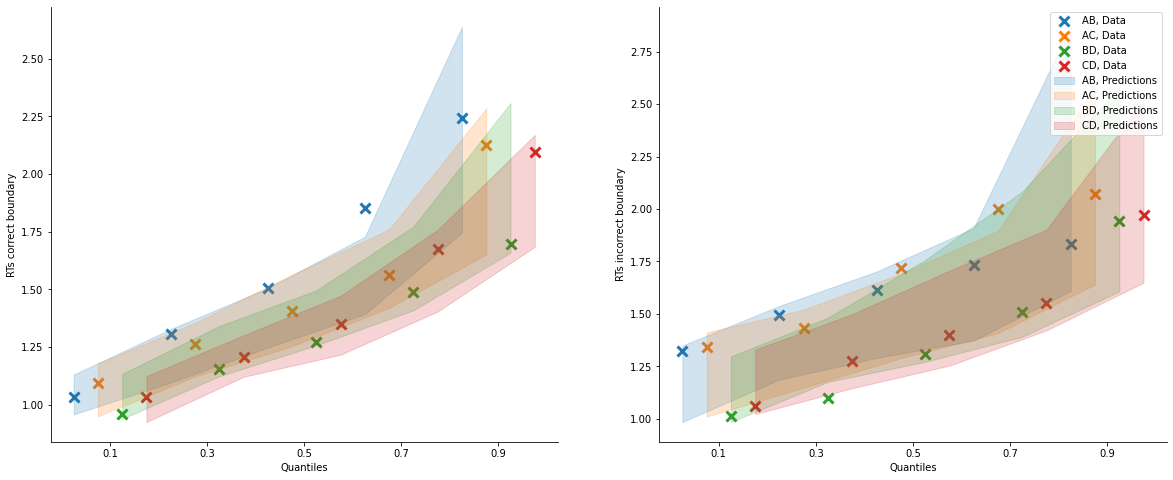

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
# sv = model_fit.last_values
# sv